In [ ]:
import importlib,sys
for m in ['papplet','vec2d','prettypath']:
    if m in sys.modules.keys():
        importlib.reload(sys.modules[m]) 
import svgwrite
from papplet import PApplet
from vec2d import *
import numpy as np
from prettypath import PrettyPath

In [ ]:
import importlib,sys
for m in ['papplet','vec2d','prettypath','svgwrite']:
    if m in sys.modules.keys():
        importlib.reload(sys.modules[m]) 
import svgwrite
from papplet import PApplet
from vec2d import *
import numpy as np
from copy import copy,deepcopy
from prettypath import PrettyPath,_map
from random import random,randint
debug=False
from time import sleep
import math

'''
LineLen=LineLen*[0.7,0.7]
T1,1 T2,1  = [   ]  #t1 given previousbranch is t1, t2 after a t1 branch
T1,2 T2,2    [   ]  #t1 after t2 branch, t2 after t2 branch
'''


class Tree():
    def __init__(self,x,y,theta1,theta2,size,depth,thetamult,lenmult):
        self.t1=theta1
        self.t2=theta2
        self.maxdepth=depth
        self.size=size
        self.tm=thetamult
        self.lenmult=lenmult
        self.x=x
        self.y=y
    def svg(self,**args):
        self.gp=svgwrite.container.Group(**args)
        st=Vec2D(x=self.x,y=self.y)
        self._recur(self.gp,st,-self.size,radians(90),self.t1,self.t2,0)
        #gp.add(svgwrite.shapes.Line(start=st.car,end=(st+Vec2D(r=50,t=radians(90))).car,stroke_width=6,stroke='black'))
        return self.gp
    def _line(self,group,here,l,t,w):
        group.add(svgwrite.shapes.Line(start=here.car,end=(here+Vec2D(r=l,t=t)).car,stroke='black',stroke_width=w))
    def _leaf(self,group,here,t):
        ss=2-random()*4
        se=2-random()*4
        ss,se=sorted((ss,se))
        es=4-random()*8
        ee=4-random()*8
        es,ee=sorted((es,ee))
        for i in range(4):
            p=PrettyPath(here,t,_map(i,0,3,ss,se),_map(i,0,3,es,ee))
            tp=p.taperedpath(5,stroke='green',stroke_width=0,start_width=2,fill='green',debug=debug)
        #tp=svgwrite.shapes.Ellipse(here.car,(2,4),fill='green')
        #tp.rotate(t.t,here.car)
            group.add(tp)
    def _recur(self,parent_group,here,line_length,t,t1,t2,depth,extra_branch=True):
        this_group=svgwrite.container.Group(debug=debug)
        parent_group.add(this_group)
        
        if depth>=self.maxdepth:
            self._leaf(this_group,here,Vec2D(r=line_length*2,t=t))
            self._leaf(this_group,here,Vec2D(r=line_length*2,t=t))
            return
        #length=[line_length *0.75,line_length *0.7]
        length=[line_length*self.lenmult[0],line_length*self.lenmult[1]]
        
        
        #theta=[[t1,t2],[t1,t2]]*[0.8,0.9],[1,0.9]
        #theta = [[t1*0.8,t2*0.9],[t1,t2*0.9]]
        theta=[[t1*self.tm[0][0],t2*self.tm[0][1]],[t1*self.tm[1][0],t2*self.tm[1][1]]]
        d=Vec2D(x=0,y=0)
        dt=0
        if extra_branch or depth<5:
            self._line(this_group,here,length[0],t+t1,self.maxdepth+1-depth)
            self._recur(this_group,here+Vec2D(r=length[0],t=t+t1),length[0],t+t1,theta[0][0],theta[0][1],depth+1,extra_branch=extra_branch)
            self._line(this_group,here,length[1],t+t2,self.maxdepth+1-depth)
            d=Vec2D(r=length[1],t=t+t2)
            dt=t2
        self._recur(this_group,here+d,length[1],t+dt,theta[1][0],theta[1][1],depth+1,extra_branch=extra_branch)
        
        if False:
            h=here+Vec2D(r=length[0]/2,t=t+t1)
            d=Vec2D(r=length[1]*self.lenmult[1]**2,t=t+t1+theta[0][1]*1.1)
            self._line(this_group,h,d.r,d.t,self.maxdepth-depth)
            self._recur(this_group,h+d,d.r,d.t,theta[1][0]*self.tm[1][0],theta[1][1]*self.tm[1][1],depth+2 if depth>=self.maxdepth-4 else self.maxdepth-4,extra_branch=False)
        #self._recur(here+Vec2D(r=length[1]/2,t=t+t2),length[1],t+t2,theta[1][0],theta[1][1],depth+2)
    #degx~=-24 degy~=68
def linetree(here,depths,length,t1,t2,thetamult,linemult,t=radians(-90)):
    trees=[]
    lines=[]
    n=len(depths)
    #t=radians(-90)
    i=0
    if n==2:
        delt=Vec2D(r=length*linemult[0],t=t+t1)
        #delt.y=-delt.y
        loc=here+delt
        lines.append(svgwrite.shapes.Line(here.car,loc.car,stroke_width=max(depths)+1,stroke='black',stroke_linecap='round'))
        tree=Tree(loc.x,loc.y,t1*thetamult[0][0],t2*thetamult[0][1],length*linemult[0],depths[0],thetamult,linemult).svg()
        tree.rotate(degrees(t1+t+radians(90)),loc.car)
        trees.append(tree)
        delt=Vec2D(r=length*linemult[1],t=t+t2)
        #delt.y=-delt.y
        loc=here+delt
        lines.append(svgwrite.shapes.Line(here.car,loc.car,stroke_width=max(depths)+1,stroke='black',stroke_linecap='round'))
        tree=Tree(loc.x,loc.y,t1*thetamult[1][0],t2*thetamult[1][1],length*linemult[1],depths[1],thetamult,linemult).svg()
        tree.rotate(degrees(t2+t+radians(90)),loc.car)
        trees.append(tree)
    elif n>2:
        d1=depths[:n//2]
        d2=depths[n//2:]
        loc=here+Vec2D(r=length*linemult[0],t=t+t1)
        m1=linetree(loc,d1,length*linemult[0],t1*thetamult[0][0],t2*thetamult[0][1],thetamult,linemult,t=t+t1)
        lines.append(svgwrite.shapes.Line(here.car,loc.car,stroke_width=max(d1)+n//2,stroke='black',stroke_linecap='round'))
        for tree in m1['trees']:
            #tree.rotate(degrees(t1),loc.car)
            trees.append(tree)
        for l in m1['lines']:
            #l.rotate(t1,loc.car)
            lines.append(l)
        loc=here+Vec2D(r=length*linemult[1],t=t+t2)
        m2=linetree(loc,d2,length*linemult[1],t1*thetamult[1][0],t2*thetamult[1][1],thetamult,linemult,t=t+t2)
        lines.append(svgwrite.shapes.Line(here.car,loc.car,stroke_width=max(d2)+n//2,stroke='black',stroke_linecap='round'))
        for tree in m2['trees']:
            #tree.rotate(degrees(t2),loc.car)
            trees.append(tree)
        for l in m2['lines']:
            #l.rotate(t1,loc.car)
            lines.append(l)
    return({'trees':trees,'lines':lines})
def mean(l):
    return float(sum(l))/max(len(l),1)
def flatten(l):
    r=[]
    for i in l:
        if isinstance(i,(list,tuple)):
            r.extend(flatten(i))
        else:
            r.extend([i])
    return r
def f(l):

    '''oh god, i dont know its too late trust me it does something important and clever'''
    a=0        
    for i in flatten(l):
        a+=2**i
    return math.log2(a)

def mymax(x):
    return max(flatten(x))
def metatree(here,depths,length,t1,t2,thetamult,linemult,t=radians(-90),depth=0):
    
    #print("metatree: depth=",depth,"length:",length)
    trees=[]
    lines=[]
    n=len(depths)
    #t=radians(-90)
    i=0
    #length=length/(linemult[0]**(f(depths)-4))
    if n==1:
        
        if depth!=0:
            l0=length
        else:
            l0=length*linemult[0]**(-depths[0])
        #print("new length:",length)
        #elif depth==2:
        #    l0=length*math.sqrt(linemult[0]*linemult[1])**(-depths[0])
        
        if isinstance(depths[0],(list,tuple)):
            m=metatree(here,depths[0],l0,t1,t2,thetamult,linemult,t=t,depth=depth)
            for tree in m['trees']:
                #tree.rotate(degrees(t+radians(90)),here.car)
                trees.append(tree)
            for line in m['lines']:
                lines.append(line)
        else:
            tree=Tree(here.x,here.y,t1,t2,l0,depths[0],thetamult,linemult).svg(stroke_linecap="round")
            tree.rotate(degrees(t+radians(90)),here.car)
            trees.append(tree)
#    elif n==2:
#        l1=length*linemult[0]**(4-f(depths[:1]))
#        l2=length*linemult[1]**(4-f(depths[1:]))
#        delt=Vec2D(r=l1*linemult[0],t=t+t1)
#        #delt.y=-delt.y
#        loc=here+delt
#        lines.append(svgwrite.shapes.Line(here.car,loc.car,stroke_width=max(depths)+1,stroke='red'))
#        tree=Tree(loc.x,loc.y,t1*thetamult[0][0],t2*thetamult[0][1],l1*linemult[0],depths[0],thetamult,linemult).svg()
#        tree.rotate(degrees(t1+t+radians(90)),loc.car)
#        trees.append(tree)
#        delt=Vec2D(r=l2*linemult[1],t=t+t2)
        #delt.y=-delt.y
#        loc=here+delt
#        lines.append(svgwrite.shapes.Line(here.car,loc.car,stroke_width=max(depths)+1,stroke='red'))
#        tree=Tree(loc.x,loc.y,t1*thetamult[1][0],t2*thetamult[1][1],l2*linemult[1],depths[1],thetamult,linemult).svg()
#        tree.rotate(degrees(t2+t+radians(90)),loc.car)
#        trees.append(tree)
    #elif n//3==n/3:
    #    d0=depths[:n//3]
    #    d1=depths[n//3:2*n//3]
    #    d2=depths[2*n//3:]
    else:
        d1=depths[int(n/2):]
        d2=depths[:int(n/2)]
        if depth==0:
            dep1=linemult[0]**-(f(depths)+(f(d1)-f(d2))/2)
            dep2=linemult[0]**-(f(depths)+(f(d2)-f(d1))/2)
        else:
            dep1=linemult[0]**-((f(d1)-f(d2))/2)
            dep2=linemult[0]**-((f(d2)-f(d1))/2)
        l1=length*dep1*linemult[0]
        l2=length*dep2*linemult[1]
        #print("new lengths:",l1,l2)
        #t1+=(max(d1)-4)*radians(-5)
        #t2+=(max(d2)-4)*radians(5)
        loc=here+Vec2D(r=l1,t=t+t1)
        m1=metatree(loc,d1,l1,t1*thetamult[0][0],t2*thetamult[0][1],thetamult,linemult,t=t+t1,depth=depth+1)
        lines.append(svgwrite.shapes.Line(here.car,loc.car,stroke_width=mymax(d1)+n//2,stroke='red',stroke_linecap='round'))
        for tree in m1['trees']:
            #tree.rotate(degrees(t1),loc.car)
            trees.append(tree)
        for l in m1['lines']:
            #l.rotate(t1,loc.car)
            lines.append(l)
        loc=here+Vec2D(r=l2,t=t+t2)
        m2=metatree(loc,d2,l2,t1*thetamult[1][0],t2*thetamult[1][1],thetamult,linemult,t=t+t2,depth=depth+1)
        lines.append(svgwrite.shapes.Line(here.car,loc.car,stroke_width=mymax(d2)+n//2,stroke='red',stroke_linecap='round'))
        for tree in m2['trees']:
            #tree.rotate(degrees(t2),loc.car)
            trees.append(tree)
        for l in m2['lines']:
            #l.rotate(t1,loc.car)
            lines.append(l)
    return({'trees':trees,'lines':lines})
class sketch(PApplet):
    def __init__(self,**args):
        super().__init__(**args)
        self.theta=[[0.7,0.85],[1.05,0.85]]
        self.length=[0.8,0.65]
        self.t1=radians(-29)
        self.t2=radians(75)
        self.one=False
        #self.p=PrettyPath(Vec2D(self.width/2,self.height*0.7),Vec2D(r=800,t=radians(-90)),1,1)
    def draw(self):
        #t1=Tree((self.mouseX/self.width-0.5)*2*np.pi,(self.mouseY/self.height-0.5)*2*np.pi,200,9,self.theta,self.length)
        #t2=Tree((self.mouseX/self.width-0.5)*2*np.pi,(self.mouseY/self.height-0.5)*2*np.pi,100,8,self.theta,self.length)
        start=Vec2D(self.width*0.6,self.height*0.6)
        Trees=[]
        here=start
        delt=Vec2D(150,0)
        #m=metatree(start,[4,4,4,[4,4,4],4,4,[4,4],4,4,[[4,4],4,[4,4,4]],[[4,4],[4,4]]],40,self.t1,self.t2,self.theta,self.length)
        m=metatree(start,[5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,4,4],40,self.t1,self.t2,self.theta,self.length)
        #if self.one:
        #    x=[3,3,[3,3]]
        #    self.one=False
        #else:
        #    x=[3,3,3,3]
        #    self.one=True
        #sleep(1)
        #m=metatree(start,x,70,self.t1,self.t2,self.theta,self.length)
        
        for t in m['trees']:
           self.dwg.add(t)
        for l in m['lines']:
           self.dwg.add(l)
           
        for i in range(0):
            if i/2==i//2:
                here-=Vec2D(0,300)
            else:
                here+=Vec2D(0,300)
            s=210
            d=7
            Trees.append(Tree(here.x,here.y,self.t1,self.t2,s,d,self.theta,self.length))
            svg=Trees[i].svg()
            svg.rotate(30+random()*0-5 if i/2==i//2 else -200+random()*0-5,here.car)
            if i/2!=i//2:
                svg.scale(-1,1)
                svg.translate(-(here.x*2),0)
            
            line=svgwrite.shapes.Line((here.x-200,here.y+ ( 150 if i/2==i//2 else -150)),here.car,stroke_width=8,stroke='black')
            self.dwg.add(line)
            self.dwg.add(svg)
            here+=delt
        #entreline=svgwrite.shapes.Line((start.x-200,start.y-150),(start+delt*10-Vec2D(-200,150)).car,stroke_width=8,stroke="black")
        #elf.dwg.add(centreline)
        
        
        
        #t1=Tree(start.x,start.y,self.t1,self.t2,100,5,self.theta,self.length)
        #t2=Tree(start.x,start.y,self.t1,self.t2,100,5,self.theta,self.length)
        #t3=Tree(start.x,start.y,self.t1,self.t2,300,8,self.theta,self.length)
        #degx=(self.mouseX/self.width-0.5)*360
        #degy=(self.mouseY/self.height-0.5)*360
        degx=degrees(self.t1)
        degy=degrees(self.t2)-15
        threedeg=(self.mouseX/self.width-0.5)*360
        dy=300
        threer=(self.mouseY/self.height)*300+200
        #self.dwg.add(svgwrite.shapes.Line(start=start.car,end=(start.x,start.y-dy),transform='rotate('+str(degx)+','+str(start.x)+','+str(start.y)+')',stroke_width=8,stroke='black'))
        #self.dwg.add(svgwrite.shapes.Line(start=start.car,end=(start.x,start.y-200),transform='rotate('+str(degy)+','+str(start.x)+','+str(start.y)+')',stroke_width=8,stroke='black'))
        #self.dwg.add(t2.svg(transform="translate(0,-"+str(dy)+") rotate("+str(degx)+","+str(start.x)+","+str(start.y+dy)+")"))
        #self.dwg.add(t1.svg(transform="translate(0,-"+str(200)+") rotate("+str(degy)+","+str(start.x)+","+str(start.y+200)+")",debug=debug))
        #self.dwg.add(t3.svg(transform="translate(0,-"+str(threer)+") rotate("+str(threedeg)+","+str(start.x)+","+str(start.y+threer)+")",debug=debug))
        #s=(self.mouseX/self.width - 0.5)*20
        
        
        
        #e=(self.mouseY/self.height - 0.5)*20
        
        #self.p=PrettyPath(start,Vec2D(r=500,t=radians(-90)),s,e)
        #ap=self.p.arcpath(10,stroke='black',stroke_width=1,fill='none')
        #print(ap,type(ap))
        #assert(False)
        #self.dwg.add(ap)
        #ap2=deepcopy(ap)
        #width=20
        #width=2*||end-start||sin(t/2)
        #width/(2*||end-start||)=sin(t/2)~=t/2 t=width/|end-start|
        #d=self.p.end-self.p.start
        #print(d.pol)
        #assert(False)
        #ap2.rotate(degrees(width/abs(d.r)),self.p.end.car)
        #self.dwg.add(ap2)
        #self.p.c0=s
        #self.p.c1=e
        #tp=self.p.taperedpath(5,stroke='black',stroke_width=2,start_width=100,fill='green')
        #self.dwg.add(tp)
        #mouse=svgwrite.text.Text("Theta0:"+str(degrees(self.p.pathpoints(5)[0][2].t)),insert=(50,900),fill='black',font_size=30)
        #self.dwg.add(mouse)
        #key1=svgwrite.text.Text("Radius:"+str(threer),insert=(50,950),fill='black',font_size=30)
        #key2=svgwrite.text.Text("Theta:"+str(threedeg),insert=(50,850),fill='black',font_size=30)
        #self.dwg.add(key1)
        #self.dwg.add(key2)
    def on_keypress(self):
        if chr(self.keydown)=='q':
            self.theta[0][0]+=0.05
        elif chr(self.keydown)=='a':
            self.theta[0][0]-=0.05
        elif chr(self.keydown)=='w':
            self.theta[0][1]+=0.05
        elif chr(self.keydown)=='s':
            self.theta[0][1]-=0.05
        elif chr(self.keydown)=='e':
            self.theta[1][0]+=0.05
        elif chr(self.keydown)=='d':
            self.theta[1][0]-=0.05
        elif chr(self.keydown)=='r':
            self.theta[1][1]+=0.05
        elif chr(self.keydown)=='f':
            self.theta[1][1]-=0.05
        elif chr(self.keydown)=='u':
            self.length[0]+=0.01
        elif chr(self.keydown)=='j':
            self.length[0]-=0.01
        elif chr(self.keydown)=='i':
            self.length[1]+=0.01
        elif chr(self.keydown)=='k':
            self.length[1]-=0.01

from IPython.display import SVG
import subprocess
svg=''
import cProfile

s=sketch(height=1800,width=2600)
#s._draw()
#cProfile('''subprocess.call(pypy )
#svg=s.dwg.tostring()
#SVG(svg)l=[1,[2,3],'a']




s.start()
#svg


AttributeError: 'vec2d.Vec2D' object has no attribute 'car'

In [ ]:
import math
def f(l):
    '''oh god, i dont know its too late trust me it does something important and clever'''
    a=0
    for i in l:
        a+=2**i
    return math.log2(a)
f([4,4,3,3])+(f([3,3])-f([4,4]))/2

In [ ]:
3600/260*20

In [ ]:
def flatten(l):
    r=[]
    for i in l:
        if isinstance(i,(list,tuple)):
            r.extend(flatten(i))
        else:
            r.extend([i])
    return r
flatten([4,[4],[[4,4],4,[4,4]],4])

In [ ]:
r.extend('b')

In [ ]:
import importlib,sys
for m in ['vec2d','prettypath','papplet']:
    if m in sys.modules.keys():
        importlib.reload(sys.modules[m])
from papplet import PApplet
from prettypath import PrettyPath
from vec2d import *
class Curve(PApplet):
    def __init__(self,**kwargs):
        super().__init__(**kwargs)
    def draw(self):
        start=Vec2D(123,456)
        t0=Vec2D(r=29.4,t=radians(37))
        tgoal=Vec2D(r=47,t=radians(9))
        end=Vec2D(789,214)

        p=PrettyPath(start,t0,-2,2,)
        p.path_to(end,5)
        #svg=p.pathpoints(5)
        self.dwg.add(p.taperedpath(5,8,fill='none',stroke='black'))
        
c=Curve(height=1000,width=1000)
c.start()

In [38]:
 
from prettypath import PrettyPath
from vec2d import *
import math
start=Vec2D(123,456)
t0=Vec2D(r=29.4,t=radians(-37))
tgoal=Vec2D(r=1,t=radians(302))
end=Vec2D(789,214)
print('goal:',end-start)

p=PrettyPath(start,Vec2D(r=1,t=t0.t),-2,3)
p.pathpoints(5)
goal=end-p.start
delt=p.end-p.start
p.t0.r=795.97
#p.t0.r=goal.r/delt.r
print('t0:',p.t0)
#p.pathpoints(5)
#print(t0.t-tgoal.t)
#p.t0,p.t1
#theta1=theta0+ Int(c(s,0,1,ds)==0.3(c1-c0)(c1c1-c0c0)
#say c1=1, c0=-1  i predict t1= 0.3(1+1)(1-1) which is true for pathpoints>>1000
#delt=p.end-p.start
#gets complicated cuz our algo fucks with the number of pathpoints

#Dt=sum([p._cp(s) for s in [j/segs for j in range(0,segs)]])/segs #(if no subdividing)
#sum of 0.1(s(c1-c0)+c0)^3+0.9(s(c1-c0)+c0) for s in range(0,1,1/segs)
#if c0==0 = 0.1s*c1^3+0.9s*c1
#adjust c0,c1 until we get there.
#Dt=1/segs*(0.1*sum([s**3 for s in [j/segs for j in range(0,segs)]])*(c1**3-c0**3)+0.9*sum([s for s in [j/segs for j in range(segs)]])*c1)
'''fuck it. just fiddle with them until they're right'''
segs=5
def thetadiff(t1,t2):
    d=degrees((t1-t2)%np.pi)
    if d>180:
        d=d-360
    return d
    
from random import random
def g(here):
    p.c0=here[0]
    p.c1=here[1]
    p.path_to(end,segs)
    p.pathpoints(segs)
    return (math.sqrt(thetadiff(tgoal.t,p.t1.t)**2+thetadiff(t0.t,p.t0.t)**2),thetadiff(tgoal.t,p.t1.t),thetadiff(t0.t,p.t0.t))

#here=(random()*10-5,random()*10-5)
'''while False:#dist>0.1:
    #hill-climb
    deltas=[(0,0.1),(0,-0.1),(0.1,0),(-0.1,0),(0.1,0.1),(0.1,-0.1),(-0.1,0.1),(-0.1,-0.1)]
    dists={g(here,d):d for d in deltas}
    #print(dists)
    #go towards least distance
    min_dist=min(dists)
    if min_dist<dist:
        dist=min_dist
        here=(here[0]+dists[min_dist][0],here[1]+dists[min_dist][1])
    else:#local minimum
        print('local minimum:',here,dist,"...resetting")
        #here=(random()*10-5,random()*10-5)
        break
'''#p.pathpoints(5)
#p.end-p.start,p.t1
#g((-2,3),(0,0))
def optimize(width=5,oom=3,bounds=5):
    min_dist=None
    centre=(0,0)
    for order_of_mag in range(oom):
        if width/10**order_of_mag>bounds:
            w=bounds*10**order_of_mag
        else:
            w=width
        dists=[]
        for x in [(j-w)/(10**order_of_mag)+centre[0] for j in range(2*w+1)]:
            for y in [(k-w)/(10**order_of_mag)+centre[1] for k in range(2*w+1)]:
                h=g((x,y))
                dists.append((h[0],(h[1],h[2]),(x,y)))
        min_dist=min(dists)
        centre=min_dist[2]
    return min_dist
from timeit import timeit
#for oom in range(5):
#    t=timeit('optimize(10,'+str(oom)+')','from __main__ import optimize',number=10)
#    print("oom:",oom,optimize(10,oom),"time:",t)

goal: Vec2D(r=708.6042619121056, θ=-19.96929032262278°)
t0: Vec2D(r=795.97, θ=-37.0°)


(0.19788612576338613, (0.1695510164162628, 0.10203612890469166), (1.69, -3.16))

In [ ]:
import svgwrite
from IPython.display import SVG
dwg=svgwrite.drawing.Drawing(size=(1000,1000))
for x in range(-1,2):
    for y in range(-1,2):
        curve=svgwrite.path.Path(fill='none',stroke='black',stroke_width=6,stroke_linecap='round')
        curve.push(['M',400+x*200,400+y*200])
        curve.push_arc((400+x*100,400+y*100),0,100,large_arc=False,angle_dir='+',absolute=True)
        dwg.add(curve)
        t0=Vec2D(400+x*100,400+y*100)-Vec2D(400+x*200,400+y*200)
        dwg.add(dwg.text("theta0="+str(int(degrees(t0.t))),insert=(400+x*200,400+y*200)))
SVG(dwg.tostring())

In [5]:
import importlib,sys
for m in ['vec2d','cprettypath','papplet']:
    if m in sys.modules.keys():
        importlib.reload(sys.modules[m])
from vec2d import *
from cprettypath import radians
import math as np
import subprocess
import xml.etree.ElementTree as etree
from cprettypath import PrettyPath,get_point
class TextPath():
    def __init__(self,text,start_width,end_width,path,segs):
        self.text=text
        self.sw=start_width
        self.ew=end_width
        self.path=path
        self.segs=segs
    def text_to_svg(self):
        with open('/tmp/text.svg','w') as f:
            f.write('<svg><text font-size="20px" font-family="Vim SM">'+self.text+'</text></svg>')  
        r=subprocess.run(['/usr/bin/inkscape','-ST','/tmp/text.svg','-l','/tmp/text.svg'],stdout=subprocess.PIPE,universal_newlines=True)

        height=float(r.stdout.split('\n')[1].split(',')[4])
        width=float(r.stdout.split('\n')[1].split(',')[3])
        #self.path.t0.r=1+width*self.sw*(np.exp((self.ew-self.sw)/height*(1))-1)/(self.ew-self.sw)

        
        textpaths=etree.parse('/tmp/text.svg').getroot()[2]
        paths=[]
        for path in textpaths:
            paths.append([[float(j) for j in i.split(',')] if (',' in i) else i for i in path.get('d').split(' ')])
        #separates paths into a command list
        
        #print(paths)    
        for k in range(len(paths)):
            here=[0,0]
            prev=[0,0]
            subpath_start=[0,0]
            curve=False
            moveto=False
            clozed=False
            curvei=0
            for i in range(len(paths[k])):
                if isinstance(paths[k][i],list):#means a relative (x,y)
                    if absolute:
                        here[0]=paths[k][i][0]
                        here[1]=paths[k][i][1]
                    else:
                        here[0]=prev[0]+paths[k][i][0]
                        here[1]=prev[1]+paths[k][i][1]
                    paths[k][i]=self.do_transform(here,height,width)
                    paths[k][i]=','.join(str(j) for j in paths[k][i])
                    if curve:#we're parsing a bezier point
                        curvei=curvei+1
                        if curvei==3:#the destination of the curve
                            prev[0]=here[0]
                            prev[1]=here[1]
                            curvei=0
                    else:
                        prev[0]=here[0]
                        prev[1]=here[1]
                    if moveto:
                        subpath_start[0]=here[0]
                        subpath_start[1]=here[1]
                        moveto=False
                else:
                    if paths[k][i]==paths[k][i].upper():
                        absolute=True
                    else:
                        absolute=False
                        paths[k][i]=paths[k][i].upper()
                    curve=False
                    moveto=False
                    if paths[k][i]=='C':
                        curve=True
                        curvei=0
                        clozed=False
                    elif paths[k][i]=='Z':
                        clozed=True
                        #prev[0]=subpath_start[0]
                        #prev[1]=subpath_start[1]
                        #here[0]=subpath_start[0]
                        #here[1]=subpath_start[1]
                    elif paths[k][i]=='M':
                        moveto=True
                        if clozed:
                            pass
                            #prev[0]=0
                            #prev[1]=0
                            #here[0]=0
                            #here[1]=0
                        clozed=False
                    else:
                        clozed=False
            paths[k]=' '.join(paths[k])

        ret='<g id="text">'
        for path in paths:
            ret+='<path d="'+path+'"/>'
        ret+='</g>'
        return(ret)
    def do_transform(self,xy,height,width):
        x,y=xy
        #x+=100
        y+=height/2
        x_p=self.sw*(np.exp((self.ew-self.sw)/height*(x/width))-1)/(self.ew-self.sw)
        y_p=y*(self.sw+(self.ew-self.sw)*x_p)/height
        x_p*=width
        x_p,y_p=self.on_path(x_p,y_p)
        
        return x_p,y_p
    def on_path(self,x,y):
        #print('x:',x)
        pathpoint=get_point(self.path,self.segs,x)
        tan=Vec2D(r=y,t=pathpoint[1]+radians(90))
        #tan._update_car()
        xy=pathpoint[0]+tan
        #return x,y
        return xy.x,xy.y
def primates(segs):
    linecolor='#cc1111'
    p=PrettyPath(Vec2D(10,50),Vec2D(r=320,t=radians(25)),-3,7)
    t=TextPath('homo sapiens',30,20,p,5)
    svg=t.text_to_svg()
    ps=p.taperedpath(5,34,end_width=0,fill='none',stroke_width=2,stroke=linecolor)
    ps=ps.tostring()

    #p2=PrettyPath(Vec2D(10,50),Vec2D(r=320,t=radians(25)),3,-7)
    #t=TextPath('homo sapiens',30,20,p2,5)
    #svg2=t.text_to_svg()
    #ps2=p.taperedpath(5,34,end_width=0,fill='none',stroke_width=2,stroke=linecolor)
    #ps2=ps2.tostring()

    p2=PrettyPath(Vec2D(10,150),Vec2D(r=260,t=radians(-40)),3.2,-5)
    t2=TextPath('pan paniscus',29,12,p2,5)
    svg2=t2.text_to_svg()
    ps2=p2.taperedpath(5,36,fill='none',stroke_width=2,stroke=linecolor).tostring()
    p3=PrettyPath(Vec2D(10,250),Vec2D(r=370,t=radians(0)),-1,4)
    t3=TextPath('pan troglodytes',30,20,p3,5)
    svg3=t3.text_to_svg()
    ps3=p3.taperedpath(5,35,fill='none',stroke_width=2,stroke=linecolor).tostring()
    #t.text_to_svg()
    p4=PrettyPath(Vec2D(-155,201),Vec2D(r=1,t=radians(-100)),1.9,-2.2)
    p4.path_to(Vec2D(10,250),5)
    ps4=p4.taperedpath(5,38,end_width=35,fill='white',stroke_width=2,stroke=linecolor).tostring()
    p5=PrettyPath(Vec2D(-350,80),Vec2D(r=1,t=radians(60)),1.5,-3)
    p5.path_to(Vec2D(-150,200),5)
    ps5=p5.taperedpath(5,38,end_width=38,fill='white',stroke_width=2,stroke=linecolor).tostring()

    p6=PrettyPath(Vec2D(-350,80),Vec2D(r=1,t=radians(-30)),-1.8,2.6)
    p6.path_to(Vec2D(10,50),5)
    ps6=p6.taperedpath(5,38,end_width=35,fill='white',stroke_width=2,stroke=linecolor).tostring()
    p7=PrettyPath(Vec2D(-150,200),Vec2D(r=1,t=radians(0)),-0.3,-1.2)
    p7.path_to(Vec2D(10,150),5)
    ps7=p7.taperedpath(5,38,end_width=35,fill='white',stroke_width=2,stroke=linecolor).tostring()


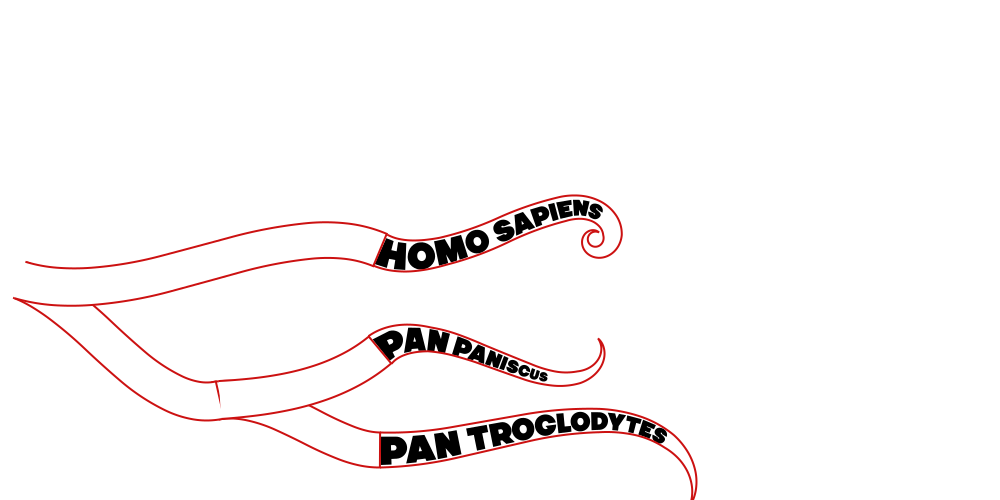

In [8]:
from IPython.display import SVG
#SVG('<svg height="500" width="1000"><g transform="translate(370,200)">'+ps7+ps6+ps5+ps4+svg+ps+svg2+ps2+svg3+ps3+ '</g></svg>')
SVG('<svg height="500" width="1000"><g transform="translate(370,200)">'+svg+ps+svg2+ps2+svg3+ps3+ps4+ps5+ps6+ps7+ '</g></svg>')


#with open('sampleleaves.svg','w') as f:
#    f.write('<svg height="500" width="1000"><g transform="translate(370,200)">'+ps7+ps6+ps5+ps4+svg+ps+svg2+ps2+svg3+ps3+ '</g></svg>')


In [20]:
s=5000
linecolor='#cc1111'
p=PrettyPath(Vec2D(10,50),Vec2D(r=320,t=radians(25)),-3,6.3,tightness=1)
t=TextPath('homo sapiens',30,15,p,s)
svg=t.text_to_svg()
ps=p.taperedpath(s,34,end_width=0,fill='none',stroke_width=2,stroke=linecolor)
ps=ps.tostring()

#p2=PrettyPath(Vec2D(10,50),Vec2D(r=320,t=radians(25)),3,-7)
#t=TextPath('homo sapiens',30,20,p2,5)
#svg2=t.text_to_svg()
#ps2=p.taperedpath(5,34,end_width=0,fill='none',stroke_width=2,stroke=linecolor)
#ps2=ps2.tostring()

p2=PrettyPath(Vec2D(10,150),Vec2D(r=260,t=radians(-40)),3.2,-5)
t2=TextPath('pan paniscus',29,12,p2,s)
svg2=t2.text_to_svg()
ps2=p2.taperedpath(s,36,fill='none',stroke_width=2,stroke=linecolor).tostring()
p3=PrettyPath(Vec2D(10,250),Vec2D(r=370,t=radians(0)),-1,4)
t3=TextPath('pan troglodytes',30,20,p3,s)
svg3=t3.text_to_svg()
ps3=p3.taperedpath(s,35,fill='none',stroke_width=2,stroke=linecolor).tostring()
#t.text_to_svg()
p4=PrettyPath(Vec2D(-155,201),Vec2D(r=1,t=radians(-100)),1.9,-2.2)
p4.path_to(Vec2D(10,250),5)
ps4=p4.taperedpath(s,38,end_width=35,fill='white',stroke_width=2,stroke=linecolor).tostring()
p5=PrettyPath(Vec2D(-350,80),Vec2D(r=1,t=radians(60)),1.5,-3)
p5.path_to(Vec2D(-150,200),5)
ps5=p5.taperedpath(s,38,end_width=38,fill='white',stroke_width=2,stroke=linecolor).tostring()

p6=PrettyPath(Vec2D(-350,80),Vec2D(r=1,t=radians(-30)),-1.8,2.6)
p6.path_to(Vec2D(10,50),5)
ps6=p6.taperedpath(s,38,end_width=35,fill='white',stroke_width=2,stroke=linecolor).tostring()
p7=PrettyPath(Vec2D(-150,200),Vec2D(r=1,t=radians(0)),-0.3,-1.2)
p7.path_to(Vec2D(10,150),5)
ps7=p7.taperedpath(s,38,end_width=35,fill='white',stroke_width=2,stroke=linecolor).tostring()
SVG('<svg height="500" width="1000"><g transform="translate(370,200)">'+svg+ps+svg2+ps2+svg3+ps3+ps4+ps5+ps6+ps7+ '</g></svg>')


In [ ]:
'''my theory: we can analytically determine x,y,theta as a function of t0,c0,c1
i.e.: dx=cos(theta)ds dy=sin(theta)ds (times length)
theta=integral(curvature(s))+t0

use taylor expansion for cos, sin.

cos(u+t0)=cos(u)*cos(t0)-sin(u)*sin(t0)
sin(u+t0)=sin(u)*cos(t0)+sin(t0)*cos(u)

c(s)=c0+(c1-c0)s 0<=s<=1
c'(s):=a*c^3+b*c(+t*c^0.5) 

redefine tightness:
tighness=0: cp=0.1s^3+s (for s from -9 to 9, gives -80 to 80 about right. )
else:       cp=0.1s^3+t*(s/t)^(1/t)
where t=1,2,3,4...


'''
def intcos(u):
    '''=sum from i=0 of : (-1)^i u^(2i+1) / ((2i+1)() '''
        

In [21]:
'''domain of cp(s)'''
from cprettypath import PrettyPath
from vec2d import Vec2D
p=PrettyPath(Vec2D(0,0),Vec2D(100,100),-0.01,0.01,tightness=1)

In [22]:
p._cp(0),p._cp(1)


(-0.10900010000000002, 0.10900010000000002)

In [154]:
def intersection(p,r,q,s):
    #line from p to r and q to s
    #dx=q.x-p.x
    #dy=q.y-p.y
    #n=dx*s.y-dy*s.x
    #d=r.x*s.y-r.y*s.x
    t = (q - p).cross(s-q) / ((r-p).cross(s-q))
    #t=n/d
    #u = (q − p).cross(r) / (r.cross(s))
    return p+(t*(r-p))
def midpoint(p,q):
    return p+(q-p)*0.5
tightness=3
curviness=7
P0=Vec2D(0,0)
P1=Vec2D(0,tightness)
P3=Vec2D(10,100)
P2=intersection(P3,Vec2D(curviness,0),Vec2D(0,tightness+10),Vec2D(10,tightness+10))
P4=intersection(P0,P3,P1,P2)
'''def memodict(f):
    """ Memoization decorator for a function taking a single argument """
    class memodict(dict):
        def __missing__(self, key):
            ret = self[key] = f(key)
            return ret 
    return memodict().__getitem__
'''
'''def static_vars(**kwargs):
    def decorate(func):
        for k in kwargs:
            setattr(func, k, kwargs[k])
        return func
    return decorate

@static_vars(tightness=None,curviness=None)
'''
def xy(t,tightness=3,curviness=7):
    update=True
    if not hasattr(xy,'tightness'):
        xy.tightness=tightness
        xy.curviness=curviness
        xy.P0=Vec2D(0,0)
        xy.P1=Vec2D(0.001,tightness)
        xy.P3=Vec2D(10,100)
        xy.P2=intersection(P3,Vec2D(curviness,0),Vec2D(0,tightness+10),Vec2D(10,tightness+10))
        xy.P4=midpoint(P1,P2)
    else:
        if xy.tightness!=tightness or xy.curviness!=curviness:
            xy.P1.y=tightness
            xy.P2=intersection(P3,Vec2D(curviness,0),Vec2D(0,tightness+10),Vec2D(10,tightness+10))
            xy.P4=midpoint(P1,P2)
    
    if t<1:
        res=xy.P0*(1-t)**2+2*xy.P1*(1-t)*t+xy.P4*(t*t)
    else:
        t-=1
        res=xy.P4*(1-t)**2+2*xy.P2*(1-t)*t+xy.P3*t*t
    return res
from math import sqrt
def t(x,tightness=3,curviness=7):
    if not hasattr(xy,'tightness'):
        xy.P0=Vec2D(0,0)
        xy.P1=Vec2D(0.001,tightness)
        xy.P3=Vec2D(10,100)
        xy.P2=intersection(P3,Vec2D(curviness,0),Vec2D(0,tightness+10),Vec2D(10,tightness+10))
        xy.P4=midpoint(P1,P2)
    else:
        if xy.tightness!=tightness or xy.curviness!=curviness:
            xy.P1.y=tightness
            xy.P2=intersection(P3,Vec2D(curviness,0),Vec2D(0,tightness+10),Vec2D(10,tightness+10))
            xy.P4=midpoint(P1,P2)
    #x=(p0-2p1)t^2+(2p1+p4-2p0)t+p0*t
    #x=(p4-2p2)(t-1)^2 +(2p2+p3-2p4)(t-1)+p4
    a=b=c=None
    if x>xy.P4.x:
        b=xy.P4.x-xy.P2.x
        a=xy.P2.x*xy.P2.x-xy.P4.x*xy.P3.x
        c=xy.P4.x-2*xy.P2.x+xy.P3.x
    else:
        b=xy.P0.x-xy.P1.x
        a=xy.P1.x*xy.P1.x-xy.P0.x*xy.P4.x
        c=xy.P0.x-2*xy.P1.x+xy.P4.x
    roots=[(b - sqrt(a +c*x))/c,(b+sqrt(a+c*x))/c]
    #roots=[(-b+sqrt(b*b-4*a*c))/(2*a),(-b-sqrt(b*b-4*a*c))/(2*a)]
    if x>xy.P4.x:
        #print('t>1')
        roots=[t+1 for t in roots]
    return roots

In [158]:
[(t(i/2),xy(t(i/2)[1]).x,i/2) for i in range(21)]

[([-0.0005415651232060655, 0.0], 0.0, 0.0),
 ([-0.36822642407931644, 0.3676848589561104], 0.5, 0.5),
 ([-0.5206385706944086, 0.5200970055712025], 0.9999999999999999, 1.0),
 ([-0.6375885335522252, 0.6370469684290192], 1.5, 1.5),
 ([-0.7361819161431389, 0.7356403510199329], 2.0, 2.0),
 ([-0.8230444314655877, 0.8225028663423817], 2.5, 2.5),
 ([-0.9015741488774588, 0.9010325837542528], 2.9999999999999996, 3.0),
 ([-0.9737896775676579, 0.9732481124444519], 3.5, 3.5),
 ([7.769534751214882, 1.0415251566192145], 4.0000000000000036, 4.0),
 ([7.700328700905288, 1.1107312069288073], 4.5000000000000036, 4.5),
 ([7.629637472296007, 1.1814224355380896], 5.000000000000001, 5.0),
 ([7.557361135465351, 1.2536987723687456], 5.500000000000003, 5.5),
 ([7.483388024701439, 1.3276718831326575], 6.000000000000003, 6.0),
 ([7.4075927132218995, 1.4034671946121977], 6.5000000000000036, 6.5),
 ([7.329833515060709, 1.4812263927733873], 7.000000000000003, 7.0),
 ([7.249949371764905, 1.5611105360691915], 7.50000000

In [83]:
def foo():
    if not hasattr(foo,'bar'):
        foo.bar=0
    else:
        foo.bar+=1
    return foo.bar

foo()
    

0

In [76]:
foo()
foo()
foo()

3

In [185]:
import importlib,sys
for m in ['vec2d','prettypath','papplet']:
    if m in sys.modules.keys():
        importlib.reload(sys.modules[m])
from prettypath import PrettyPath
from vec2d import Vec2D
p=PrettyPath(Vec2D(0,0),Vec2D(r=100,t=0.4),-1,2)
path=p.pathpoints(5)

In [555]:
%load_ext cython

In [557]:
%%cython

#import numpy as np
import math as np

def degrees(radians):
    return 360*radians/2/np.pi
def radians(degrees):
    return degrees*2*np.pi/360
class cVec2D():
    def __init__(self,x=None,y=None,r=None,t=None):
        #self.car=Car(x,y)
        #self.pol=Pol(r,t)
        self._pol=False
        self._car=False
        if x!=None and y!=None:
            self.x=x
            self.y=y
            self._car=True
            #self._update_pol()
        elif r!=None and t!=None:
            self.r=r
            self.t=t
            self._pol=True
    def car(self):
        if not self._car:
            self._update_car()
        return (self.x,self.y)
    def pol(self):
        if not self._pol:
            self._update_pol()
        return (self.r,self.t)
    def __repr__(self):
        if self._pol:
            return "cVec2D(r="+str(self.r)+", θ="+str(degrees(self.t))+"°)"
        else:
            return "cVec2D(x="+str(self.x)+", y="+str(degrees(self.y))+")"
    def _update_car(self):
        #self.car=Car(self.pol.r*np.cos(self.pol.t),self.pol.r*np.sin(self.pol.t))
        #self.x=self.car.x
        #self.y=self.car.y
        self.x=self.r*np.cos(self.t)
        self.y=self.r*np.sin(self.t)
        self._car=True
    def _update_pol(self):
        self.r=np.sqrt(self.x**2+self.y**2)
        
        self.t=np.atan2(self.y,self.x)   #PYPY
        self._pol=True
    def __mul__(self,other):
        if not self._car:
            self._update_car()
        return cVec2D(x=self.x*other,y=self.y*other)
    def __rmul__(self,other):
        if not self._car:
            self._update_car()
        return cVec2D(x=self.x*other,y=self.y*other)
    def __add__(self,other):
        if not self._car:
            self._update_car()
        if not other._car:
            other._update_car()
        return cVec2D(x=self.x+other.x,y=self.y+other.y)
    def __sub__(self,other):
        if not self._car:
            self._update_car()
        if not other._car:
            other._update_car()
        return cVec2D(x=self.x-other.x,y=self.y-other.y)
    def cross(self,other):
        if not self._car:
            self._update_car()
        if not other._car:
            other._update_car()
        return self.x*other.y-self.y-other.x
    def dot(self,other):
        if not self._car:
            self._update_car()
        if not other._car:
            other._update_car()
        return self.x*other.x+self.y*other.y
    def rotate(self,t):
        if not self._pol:
            self._update_pol()
        self.t+=t;
        self._car=False
        self.x=None
        self.y=None
    def x(self):
        if not self._car:
            self._update_car()
        return self.x
    def y(self):
        if not self._car:
            self._update_car()
        return self.y
    def r(self):
        if not self._pol:
            self._update_pol()
        return self.r
    def t(self):
        if not self._pol:
            self._update_pol()
        return self.t


In [560]:
def f(*args,**kwargs):
    if 'x' in kwargs:
        print(kwargs['x'])
f(x=2)

2


In [1]:
def g(a,b):
    return(a,b)
def f(*args):
    return g(*args)

f(1,2)

(1, 2)

In [4]:
import importlib,sys
for m in ['wvec2d']:
    if m in sys.modules.keys():
        importlib.reload(sys.modules[m])
from wvec2d import Vec2D
a=Vec2D(10,20)
a

Vec2D(x=10.0, y=20.0)

In [5]:
a.v

cVec2D(x=10.0, y=1145.9155902616465)

In [162]:
%display latex
"\begin{cases} s \ {\mapsto}\ -2 \, p_{1_{y}} {\left(s - 1\right)} s + p_{4_{y}} s^{2} &\text{on $(0, 1)$}\cr s \ {\mapsto}\ -2 \, p_{2_{y}} {\left(s - 1\right)} s + p_{4_{y}} s^{2} + 100 \, {\left(s - 1\right)}^{2} &\text{on $(1, 2)$}\cr \end{cases}$$"

ERROR: Line magic function `%display` not found.


'\x08egin{cases} s \\ {\\mapsto}\\ -2 \\, p_{1_{y}} {\\left(s - 1\right)} s + p_{4_{y}} s^{2} &\text{on $(0, 1)$}\\cr s \\ {\\mapsto}\\ -2 \\, p_{2_{y}} {\\left(s - 1\right)} s + p_{4_{y}} s^{2} + 100 \\, {\\left(s - 1\right)}^{2} &\text{on $(1, 2)$}\\cr \\end{cases}$$'

In [188]:
class Polynomial(list):
    def __add__(self,other):
        if type(other) not in (Polynomial,list,tuple):
            other=[other]
        m=max(len(self),len(other))
        ret=Polynomial([0]*m)
        for i in range(m):
            if i<len(self) and i<len(other):
                ret[i]=self[i]+other[i]
            elif i<len(self):
                ret[i]=self[i]
            else:
                ret[i]=other[i]
        return ret
    def __radd__(self,other):
        return self.__add__(other)
    def __mul__(self,other):
        if type(other) not in (Polynomial,list,tuple):
            other=[other]
        #[1,1]*[2]=[2,2]
        #[1]*[2]=[2]
        #[1,1,1]*[2]=[2,2,2]
        #[1,1]*[2,2]=[2,4,2]
        #[1,1,1]*[2,2,2]=[2,4,6,4,2]
        ret=[0]*(len(self)+len(other)-1)
        for i in range(len(self)):
            for j in range(len(other)):
                ret[i+j]+=self[i]*other[j]
        return Polynomial(ret)
    def __rmul__(self,other):
        return self.__mul__(other)
    def int(self):
        r=Polynomial([0]*(len(self)+1))
        for i in range(len(self)):
            r[i+1]=self[i]*(1/(i+1))
        return r
    def pow(self,n):
        #raise self to the nth (integer) power
        if type(n) is not int:
            raise TypeError
        ret=Polynomial([1])
        for i in range(n):
            ret=ret*self
        return ret
a=Polynomial([1,2,3])
b=Polynomial([0,2,0,1])
b.pow(2)

[0, 0, 4, 0, 4, 0, 1]

In [191]:
#ax-bx^3+cx^5
#a large
# a+5cx^4>3bx^2 for x>0
c=1/100
for a in range(10,110,10):
    b=(10-a)/100-100*c
    

SyntaxError: invalid syntax (<ipython-input-191-e9517b5c6404>, line 1)

In [193]:
from vec2d import Vec2D

def intersection(p,r,q,s):
    #line from p to r and q to s
    t = (q - p).cross(s-q) / ((r-p).cross(s-q))
    return p+(t*(r-p))

def midpoint(p,q):
    return p+(q-p)*0.5
p1=Vec2D(0,3)
p2=intersection(Vec2D(10,100),Vec2D(7,0),Vec2D(0,3+10),Vec2D(10,3+10))
p4=midpoint(p1,p2)


In [194]:
p1,p2,p4

(Vec2D(x=0.0,y=3.0),
 Vec2D(x=7.390000000000001,y=13.0),
 Vec2D(x=3.6950000000000003,y=8.0))

In [199]:
from math import exp,log,sqrt
def goal(s):
    return (exp(-(s))*3*sqrt(s/3)+(exp((s)/10*log(101))-1))
goal(10)

100.00024866565643

In [209]:
#as+bs^3+cs^5
best=None
bestfitness=9999999
#for a in range(100):
a=8    
for j in range(100):
    b=-j/10
    for i in range(-20,21):
        c=((100+i)-b*1000-10*a)/100000
        s=0
        for k in range(20):
            x=3*k/20
            s+=(a*x+b*x**3+c*x**5-goal(x))**2
        fitness=sqrt(s)
        if fitness<bestfitness:
            best=(a,b,c)
            bestfitness=fitness
best

(8, -1.2, 0.0124)

In [234]:
import numpy as np
x1=np.array([i/100 for i in range(1000)]+[3+i/10 for i in range(0)])
xs1=np.array([sqrt(i) for i in x1])
x2=np.array([i**2 for i in x1])
x3=np.array([i**3 for i in x1])
xs3=np.array([i**(3/2) for i in x1])
x5=np.array([i**5 for i in x1])
xs5=np.array([i**(5/2) for i in x1])
x7=np.array([i**7 for i in x1])
xs7=np.array([i**(7/2) for i in x1])
y1=np.array([goal(i) for i in x1])
#A1=np.array([j,1] for j in x1)
#A3=np.array([[x3[j],x1[j],xs[j]] for j in range(len(x1))])
#A5=np.array([[x5[j],x3[j],1] for j in range(len(x1))])
#A7=np.array([[x7[j],x5[j],x3[j],x1[j],xs[j]] for j in range(len(x1))])
A7=np.array([[x5[j],x3[j],x1[j],xs7[j],xs5[j],xs3[j],xs1[j]] for j in range(len(x1))])
B=y1
X7=np.linalg.lstsq(A7,B)
#X3=np.linalg.lstsq(A3,B)
X7


(array([  2.33221926e-03,   1.82650217e+00,  -5.18325222e+00,
         -3.80014874e-01,  -2.71566141e+00,   4.50442013e+00,
          3.16608716e+00]),
 array([ 0.98092815]),
 7,
 array([  9.51558719e+05,   6.28154892e+03,   2.38171645e+02,
          2.87917253e+01,   5.05532361e+00,   9.92498156e-01,
          1.24607199e-01]))

In [243]:
import itertools
[sum([j if j else 0 for j in i]) for i in itertools.zip_longest([1,2,3],[4,5])]

[5, 7, 3]

In [141]:
g=dwg.g()
g.add(dwg.circle((3,4),r=7))
l=dwg.line((27,35),(96,54),stroke='green',stroke_width=10)
tp=dwg.textPath(l,'name')
t=dwg.text('',font_family='Vim SM',font_size=18,fill='pink')
t.add(tp)
g.add(l)
g.add(t)
[type(e) for e in g.elements]
g.tostring()

'<g><circle cx="3" cy="4" r="7" /><line id="id5" stroke="green" stroke-width="10" x1="27" x2="96" y1="35" y2="54" /><text fill="pink" font-family="Vim SM" font-size="18"><textPath xlink:href="#id5">name</textPath></text></g>'

In [396]:
import importlib,sys
for m in ['vec2d','betterpath']:
    if m in sys.modules.keys():
        importlib.reload(sys.modules[m]) 
from betterpath import *
import betterpath

In [397]:
c0=-7
c1=2
i=3
t0=0
c=cos(poly_theta(t0,c0,i),10)
xy(t0,c0,c1,0,i),xy(t0,c0,c1,1,i)
#len(c)
(-7)

-8.05312907201221e+235 - 1006262753179.117 * -7 ^ 370.0


OverflowError: (34, 'Numerical result out of range')

In [408]:
((-7)**int(370)*1006262753179117)//1000

4886368355378507288432743599837376075537521770188414978727617623011897242184659943255884927998300515255460271262564341901884065503418960087071961771922564267102634319744074644629609607818118617225847511415360505340285191780294136511650734101165361677492542750236376537686946513305964537347413181643111238716178765947998755303

In [14]:
a=1006262753179.117
b=8.05312907201221e+235
a=a.hex().split('x')[1].split('.')
[a[0]]+a[1].split('+')


['1', 'd493de2f363bep', '39']

In [364]:
a.

[(0, 1)]

In [367]:
Poly([0])+1*Poly([1])**(0//2)

[1]

In [372]:
self=Poly([1])
other=Poly([1])
if type(other) != Poly:
    if type(other) in (tuple,list):
        other=Poly(other)
    else:
        other=Poly([other])
ret=Poly([0])
for idx,s in enumerate(self):
    if (idx//2)!=idx/2:
        if s!=0:#half power coefficients must be zero
            print("Half Power Coefficients Must be Zero")
            ret= None
    else:
        ret=r+s*(other**(idx//2))
        print(s,other,idx,s*(other**(idx//2)))
ret

1 [1] 0 [1]


[0, 1]

[2]

In [110]:
import xml.etree.ElementTree as etree
#filename='/home/bwsq/Documents/TreeOfLife/processing-lite/fiverandom1.svg'
filename='/home/bwsq/Desktop/test.svg'
Y=etree.parse(filename)
    

In [78]:
ns['svg']=

'http://www.w3.org/2000/svg'

In [94]:
def parse_prettypaths(ElementTree)
    def s():
        for g in ElementTree.findall('.//svg:g',ns):
            if g.get('id').startswith('prettypath'):
                yield g
    for g in s():
        widths=[]
        pathstuff={}
        paths=g.findall('svg:path',ns)
        for p in paths:
            d=p.get('d').split(' ')
            r=[]
            for i in d:
                r.extend(i.split(','))
            d=r
            if len(d)==5:#width line
                st=Vec2D(*d[1:3])
                en=Vec2D(*d[3:5])
                w=(st-en).r
                m=(st+en)*0.5
                widths.append(w,m)
            else:#path
                assert(d.pop(0)=='M')#will not work if relative coordinates
                st=Vec2D(d.pop(0),d.pop(0))
                assert(d.pop(0)=='C')
                tan0=Vec2D(d.pop(0),d.pop(0))
                tan1=Vec2D(d.pop(0),d.pop(0))
                en=Vec2D(d.pop(0),d.pop(0))
                assert(len(d)==0)#should be it
                pathstuff['start']=st
                pathstuff['end']=en
                pathstuff['theta0']=tan0-st
                pathstuff['theta1']=tan1-en

        pathstuff['width0']=min(((w[1]-pathstuff['start']).r,w[0]) for w in widths)[1]
        pathstuff['width1']=max(((w[1]-pathstuff['end']).r,w[0]) for w in widths)[1]

        yield pathstuff

[<Element '{http://www.w3.org/2000/svg}g' at 0x7f096221df98>,
 <Element '{http://www.w3.org/2000/svg}g' at 0x7f0962221188>]

In [131]:
from vec2d import Vec2D
Vec2D(0,5)-Vec2D(6,7)

Vec2D(x=-6.0,y=-2.0)

In [129]:
prettyg=Y.getroot()[2][0]
prettyg.get('id'),prettyg[0].get('id')
d=prettyg[1].get('d').split(' ')
r=[]
for i in d:
    r.extend(i.split(','))
r[1:2]

['112.99386']

In [116]:
ns={'svg':'http://www.w3.org/2000/svg'}
p=z[3][0].find('svg:path',ns)
#p.attrib,list(p)
def parse_path(p):
    l=p.get('d').split(' ',',')
    assert(l.pop(0)=='m')
    d={'start','starttheta','end','endtheta','startwidth','endwidth'}
    

In [47]:
p.attrib

{'d': 'm 1540.266,1072.8188 a 39.915581,39.915581 0 0 0 2.4255,-10.2826 50.920038,50.920038 0 0 0 -0.176,-11.45 64.68474,64.68474 0 0 0 -2.7179,-11.931 82.567091,82.567091 0 0 0 -8.2846,-17.5245 123.77708,123.77708 0 0 0 -12.4925,-16.6351 215.30514,215.30514 0 0 0 -32.8255,-29.68749 276.90638,276.90638 0 0 1 -39.0032,-34.62175 126.60221,126.60221 0 0 1 -16.9877,-23.07365 100.12098,100.12098 0 0 1 -10.8885,-27.96681 l 38.0043,-8.75648 a 61.12098,61.12098 0 0 0 6.8791,16.93792 87.26888,87.26888 0 0 0 11.9151,15.71234 237.23972,237.23972 0 0 0 33.598,29.41188 255.30514,255.30514 0 0 1 39.1939,34.95833 164.11041,164.11041 0 0 1 16.89,21.84722 123.23376,123.23376 0 0 1 12.7577,26.02029 105.68474,105.68474 0 0 1 4.875,19.4308 92.253372,92.253372 0 0 1 0.786,20.7833 81.582248,81.582248 0 0 1 -4.4807,21.1897',
 'id': 'path8632',
 'style': 'fill:none;stroke:#008000;stroke-width:2',
 '{http://www.inkscape.org/namespaces/inkscape}connector-curvature': '0'}

In [96]:
import svgwrite
dwg=svgwrite.Drawing()
p=dwg.path()
p.push(['M',50,50,'C',95,35,0,95,100,100])
dwg.add(p)

from IPython.display import SVG
SVG(dwg.tostring())

In [98]:
svgwrite.te

'<svg baseProfile="full" height="100%" version="1.1" width="100%" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><path d="M 50 50 C 95 35 0 95 100 100" /></svg>'